In [1]:
import random

def roll_dice(num_dice):
    """
    Roll a specified number of six-sided dice and return the results sorted in descending order.

    Args:
        num_dice (int): Number of dice to roll.

    Returns:
        list: A list of dice results sorted in descending order.
    """
    dice_rolls = [random.randint(1, 6) for _ in range(num_dice)]
    return sorted(dice_rolls, reverse=False)

def calculate_success_and_failure(dice_rolls, str_modifier, success_threshold = 4):
    """
    Calculate the number of success and failure dice based on the dice rolls and strength modifier.

    Args:
        dice_rolls (list): List of dice results. Dice must be increasing order!
        str_modifier (int): Strength modifier to adjust the dice results.

    Returns:
        tuple: A tuple containing the number of success dice, failure dice, and adjusted dice results.
    """
    adjusted_rolls = []
    
    # DICE ROLLS MUST BE IN INCREASING ORDER!
    # Apply positive or negative modifier starting from the highest failure die
    if str_modifier > 0:
        for roll in reversed(dice_rolls):
            # if this roll failed ..
            if roll < success_threshold:
                roll += str_modifier # Add current str_modifier to roll
                if roll > success_threshold: # but if then roll exceeds success_threshold

                    str_modifier = roll - success_threshold # Put exceeded part back ..
                    roll = success_threshold # .. and set roll to exactly success_threshold
                else:    
                    str_modifier = 0  # Apply the modifier only once
            adjusted_rolls.append(roll)
        adjusted_rolls = adjusted_rolls[::-1]
    elif str_modifier < 0:
        for roll in dice_rolls:
            # if this roll succeeded ..
            if roll >= success_threshold and str_modifier < 0:
                roll += str_modifier # Add current str_modifier to roll
                if roll < success_threshold - 1: # but if then roll is lower then success_threshold - 1
                    str_modifier = roll - success_threshold + 1 # Put exceeded part back ..
                    roll = success_threshold - 1 # .. and set roll to exactly success_threshold - 1
                else:
                    str_modifier = 0  # Apply the modifier only once
            adjusted_rolls.append(roll)
    else:
        adjusted_rolls = dice_rolls.copy()

    success_count = sum(1 for roll in adjusted_rolls if roll >= success_threshold)
    failure_count = len(dice_rolls) - success_count

    return success_count, failure_count, adjusted_rolls

def check_hit(failure_count, enemy_evasion):
    """
    Determine if the attack hits based on the number of failure dice and the enemy's evasion value.

    Args:
        failure_count (int): Number of failure dice.
        enemy_evasion (int): Enemy's evasion value.

    Returns:
        bool: True if the attack hits, False if it misses.
    """
    return failure_count <= enemy_evasion

def calculate_damage(success_count, weapon_multiplier):
    """
    Calculate the damage dealt based on the number of success dice and the weapon's damage multiplier.

    Args:
        success_count (int): Number of success dice.
        weapon_multiplier (int): Weapon's damage multiplier.

    Returns:
        int: The total damage dealt.
    """
    return success_count * weapon_multiplier

def simulate_attack(num_dice, str_modifier, enemy_evasion, weapon_multiplier, do_print = False):
    """
    Simulate an attack by rolling dice, adjusting for strength, checking hit, and calculating damage.

    Args:
        num_dice (int): Number of dice to roll for the attack.
        str_modifier (int): Strength modifier to adjust the dice results.
        enemy_evasion (int): Enemy's evasion value to determine if the attack hits.
        weapon_multiplier (int): Weapon's damage multiplier for calculating damage.

    Returns:
        None
    """
    # Roll the dice
    dice_rolls = roll_dice(num_dice)
    

    # Calculate success and failure counts after adjusting for strength modifier
    success_count, failure_count, adjusted_rolls = calculate_success_and_failure(dice_rolls, str_modifier)

    # Check if the attack hits
    if check_hit(failure_count, enemy_evasion):
        # Calculate and print damage if the attack hits
        damage = calculate_damage(success_count, weapon_multiplier)
        #print(f"Attack hits! Damage dealt: {damage}")
    else:
        damage = 0
        failure_count = failure_count + success_count
        success_count = 0
    if do_print:
        print(f"Original dice rolls: {dice_rolls}")
        print(f"Adjusted dice rolls: {adjusted_rolls}")
        print(f"Success count: {success_count}, Failure count: {failure_count}")
    return dice_rolls, adjusted_rolls, success_count, failure_count, damage



In [2]:
# 示例参数
num_dice = 3  # Number of dice to roll
str_modifier = 2  # Strength modifier
enemy_evasion = 2  # Enemy's evasion value
weapon_multiplier = 1  # Weapon's damage multiplier

# Simulate the attack with the given parameters
simulate_attack(num_dice, str_modifier, enemy_evasion, weapon_multiplier)


([1, 2, 4], [1, 4, 4], 2, 1, 2)

In [3]:
import numpy as np

num_dice = 3  # Number of dice to roll
num_dice_range = [1, 3, 5]
#str_modifier = 6  # Strength modifier
str_mod_range = range(0, 10)
enemy_evasion = 5  # Enemy's evasion value
weapon_multiplier = 1  # Weapon's damage multiplier

# Stats
success_rates = []
dmg_expect_array = []

for num_dice in num_dice_range:
    success_rates = []
    for str_modifier in str_mod_range:
        total_successes = 0
        total_failures = 0
        print(str_modifier)
        for trials in range(50000):
            dice_rolls, adjusted_rolls, success_count, failure_count, damage = \
                simulate_attack(num_dice, str_modifier, enemy_evasion, weapon_multiplier)
            total_successes += success_count
            total_failures += failure_count
        success_rates.append(num_dice * total_successes * 1.0 / (total_successes + total_failures))
        print(total_successes * 1.0 / (total_successes + total_failures))
    dmg_expect = np.array(success_rates)
    dmg_expect_array.append(dmg_expect)

0
0.49616
1
0.6681
2
0.8356
3
1.0
4
1.0
5
1.0
6
1.0
7
1.0
8
1.0
9
1.0
0
0.49982666666666664
1
0.6420866666666667
2
0.7598
3
0.8612733333333333
4
0.9168666666666667
5
0.9579066666666667
6
0.9843866666666666
7
0.99354
8
0.9983266666666667
9
1.0
0
0.501144
1
0.619708
2
0.714
3
0.788636
4
0.846744
5
0.896356
6
0.9358
7
0.96088
8
0.979208
9
0.989752


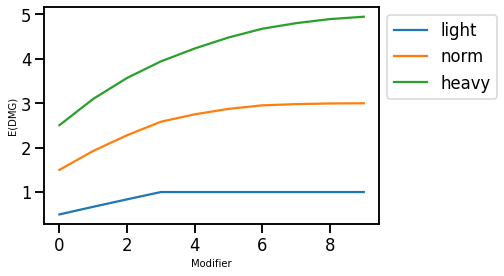

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

plt.plot(dmg_expect_array[0])
plt.plot(dmg_expect_array[1])
plt.plot(dmg_expect_array[2])

plt.xlabel("Modifier")
plt.ylabel("E(DMG)")
plt.legend(["light","norm","heavy"], bbox_to_anchor = [1,1])

# TEST HIGH EVASION

In [11]:
import numpy as np

num_dice = 3  # Number of dice to roll
num_dice_range = [1, 3, 5]
#str_modifier = 6  # Strength modifier
str_mod_range = range(0, 10)
enemy_evasion = 1  # Enemy's evasion value
weapon_multiplier = 1  # Weapon's damage multiplier

# Stats
success_rates = []
dmg_expect_array = []

for num_dice in num_dice_range:
    success_rates = []
    for str_modifier in str_mod_range:
        total_successes = 0
        total_failures = 0
        print(str_modifier)
        for trials in range(50000):
            dice_rolls, adjusted_rolls, success_count, failure_count, damage = \
                simulate_attack(num_dice, str_modifier, enemy_evasion, weapon_multiplier)
            total_successes += success_count
            total_failures += failure_count
        success_rates.append(num_dice * total_successes * 1.0 / (total_successes + total_failures))
        print(total_successes * 1.0 / (total_successes + total_failures))
    dmg_expect = np.array(success_rates)
    dmg_expect_array.append(dmg_expect)

0
0.50006
1
0.67014
2
0.83598
3
1.0
4
1.0
5
1.0
6
1.0
7
1.0
8
1.0
9
1.0
0
0.37656666666666666
1
0.5543133333333333
2
0.7169466666666666
3
0.84172
4
0.9104266666666667
5
0.95696
6
0.985
7
0.99408
8
0.99856
9
1.0
0
0.155416
1
0.305192
2
0.470584
3
0.621736
4
0.746168
5
0.838468
6
0.908128
7
0.948296
8
0.974308
9
0.988508


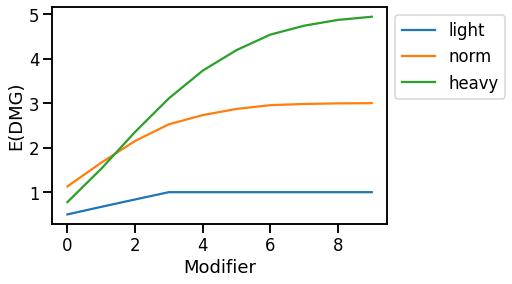

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

plt.plot(dmg_expect_array[0])
plt.plot(dmg_expect_array[1])
plt.plot(dmg_expect_array[2])

plt.xlabel("Modifier")
plt.ylabel("E(DMG)")
plt.legend(["light","norm","heavy"], bbox_to_anchor = [1,1])

# TEST ONHIT EFFECT

In [7]:
import numpy as np

num_dice = 3  # Number of dice to roll
num_dice_range = [1, 3, 5]
#str_modifier = 6  # Strength modifier
str_mod_range = range(0, 10)
enemy_evasion = 0  # Enemy's evasion value
weapon_multiplier = 1  # Weapon's damage multiplier

# Stats
success_rates = []
dmg_expect_array = []

for num_dice in num_dice_range:
    success_rates = []
    for str_modifier in str_mod_range:
        total_successes = 0
        total_failures = 0
        print(str_modifier)
        for trials in range(50000):
            dice_rolls, adjusted_rolls, success_count, failure_count, damage = \
                simulate_attack(num_dice, str_modifier, enemy_evasion, weapon_multiplier)
            total_successes += success_count
            total_failures += failure_count
        success_rates.append((num_dice + 2) * total_successes * 1.0 / (total_successes + total_failures))
        print(total_successes * 1.0 / (total_successes + total_failures))
    dmg_expect = np.array(success_rates)
    dmg_expect_array.append(dmg_expect)

0
0.5003
1
0.66976
2
0.83348
3
1.0
4
1.0
5
1.0
6
1.0
7
1.0
8
1.0
9
1.0
0
0.1236
1
0.24886
2
0.41452
3
0.63134
4
0.76674
5
0.87774
6
0.95348
7
0.98158
8
0.99556
9
1.0
0
0.03186
1
0.08406
2
0.17188
3
0.30196
4
0.44116
5
0.59154
6
0.72904
7
0.82952
8
0.9045
9
0.95248


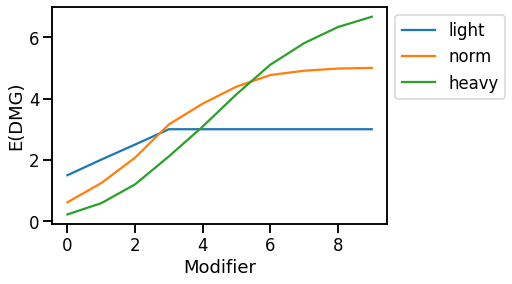

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

plt.plot(dmg_expect_array[0])
plt.plot(dmg_expect_array[1])
plt.plot(dmg_expect_array[2])

plt.xlabel("Modifier")
plt.ylabel("E(DMG)")
plt.legend(["light","norm","heavy"], bbox_to_anchor = [1,1])